In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,RandomizedLogisticRegression
from sklearn.cross_validation import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


0.7


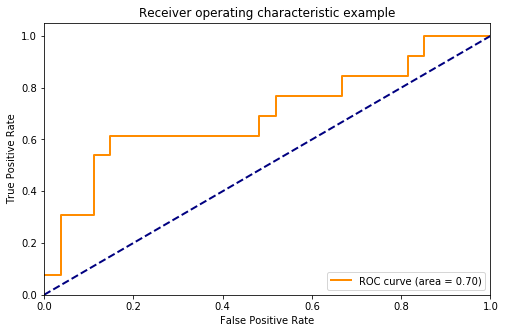

In [3]:
#低维问题
#读入数据，数据预处理
data=pd.read_csv("lr-binary.csv")
#更改列名
data.columns=["admit","GRE","GPA","schoolrank"]
##构造哑变量，并添加前缀
schoolrank=pd.get_dummies(data["schoolrank"],prefix="schoolrank")
#删除原有的schoolrank列
data=data.drop("schoolrank",1)
#将哑变量列添加到数据框中
data=data.join(schoolrank.loc[:,"schoolrank_2":])
#划分训练集，预测集
x_train,x_test,y_train,y_test=train_test_split(data.ix[:,1:],data.ix[:,0],test_size=.1,random_state=12)
#模型建立
lr=LogisticRegression()
#模型拟合
lr.fit(x_train,y_train)
#模型预测
y_pred=lr.predict(x_test)
#总正确率
print(accuracy_score(y_test,y_pred))
#计算分值：样本点到超平面的距离
y_score=lr.fit(x_train,y_train).decision_function(x_test)
#计算fpr,tpr,阈值
fpr,tpr,threshold=roc_curve(y_test,y_score)
#计算auc
roc_auc=auc(fpr,tpr)
#画出ROC曲线
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)  ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [4]:
y_score

array([-0.31536639, -0.60473081, -1.36704222, -0.95761789, -1.02886796,
       -1.00576945, -1.4583038 , -0.99892725, -1.47120163, -1.16437792,
       -0.26191345, -0.84486592, -0.38606907,  0.10897778, -1.16969363,
       -0.10968396, -0.51984568, -1.00323253, -0.76483076, -0.61692103,
        0.40033443, -0.82210793, -1.2731158 , -1.61813226, -1.58649052,
        0.23263535, -1.33789077, -0.57458324, -0.33767565, -0.59154448,
       -1.4081277 , -0.19635176, -1.30624903, -0.77822665, -0.83380009,
       -0.5897618 , -1.52108923, -1.29765647, -1.30549478, -0.72204424])

In [5]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [7]:
DATA=pd.read_csv("lr-binary.csv")
DATA

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


In [62]:
data

,admit,GRE,GPA,schoolrank_2,schoolrank_3,schoolrank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1
5,1,760,3.00,1,0,0
6,1,560,2.98,0,0,0
7,0,400,3.08,1,0,0
8,1,540,3.39,0,1,0
9,0,700,3.92,1,0,0


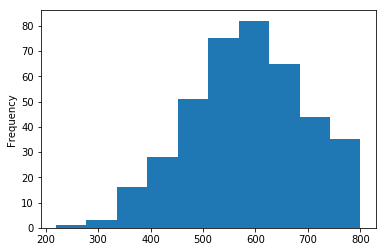

In [28]:
#GRE分数直方图
data1=data.iloc[:,1]
data1.plot.hist()

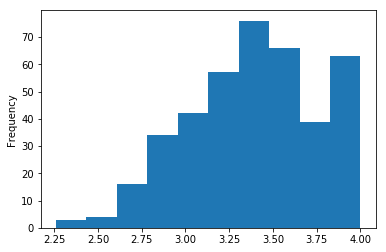

In [31]:
#GPA直方图
data2=data.iloc[:,2]
data2.plot.hist()

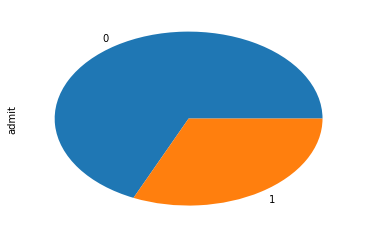

In [40]:
#是否录取饼图
data3=data.iloc[:,0]
dt3=data3.value_counts()
dt3.plot.pie()

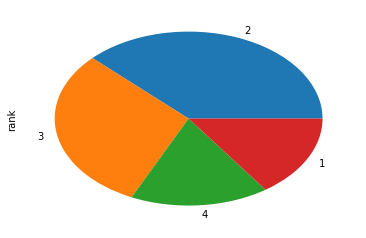

In [58]:
#学校排名饼图
DATA=pd.read_csv("lr-binary.csv")
data4=DATA.iloc[:,3]
dt4=data4.value_counts()
dt4.plot.pie()

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve,auc

In [23]:
#高维问题，本例子是利用逻辑回归做数字分类
#数据集中有共有10种数字图片，数字分别是0-9
#每种类别的数字大概有180张图片，总共的图片数目为1797张
#每个样本都是一个8x8的图片，即64个像素点，像素的变化范围是0-16。本例中LR模型的特征维度为64。
#将这些样本分为两类：0-4为一类，5-9为一类
digits=datasets.load_digits()
print(digits["DESCR"])
print(digits["data"])
print(digits["images"].shape)
print(digits["target"].shape)


Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

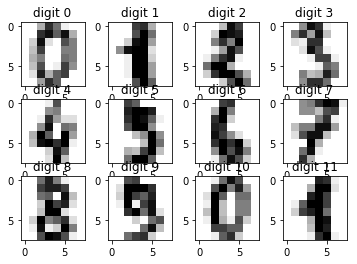

In [48]:
#显示前12张图片
plt.figure(1)
for i in range(12):
    imageplot=plt.subplot(3,4,i+1)
    plt.imshow(digits.images[i],cmap="binary",vmax=16,vmin=0)
    imageplot.set_title("digit %d"%i)


In [171]:
#读取数据x和目标y，并将数据x归一化,均值为0，方差为1
x,y=digits.data,digits.target
x=StandardScaler().fit_transform(x)

In [172]:
#将数据集分为两类，0-4为一类，5-9为一类
#划分训练集，预测集
y1=(y>4).astype(np.int)
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=.3,random_state=1)

0 100
c=100.00
L1罚得到的参数稀疏性:4.69%
L1罚得到的模型训练性能:0.8990
L1罚得到的模型预测性能:0.9019
L2罚得到的参数稀疏性:4.69%
L2罚得到的模型训练性能:0.8966
L2罚得到的模型预测性能:0.9056


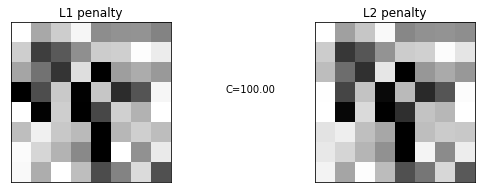

<Figure size 432x288 with 0 Axes>

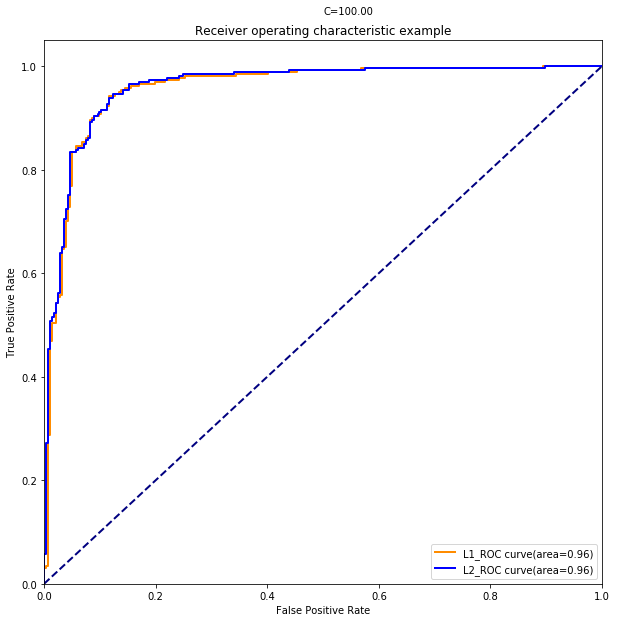

1 1
c=1.00
L1罚得到的参数稀疏性:18.75%
L1罚得到的模型训练性能:0.8998
L1罚得到的模型预测性能:0.9074
L2罚得到的参数稀疏性:4.69%
L2罚得到的模型训练性能:0.8974
L2罚得到的模型预测性能:0.9037


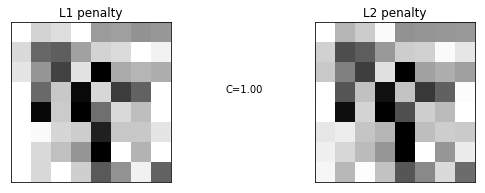

<Figure size 432x288 with 0 Axes>

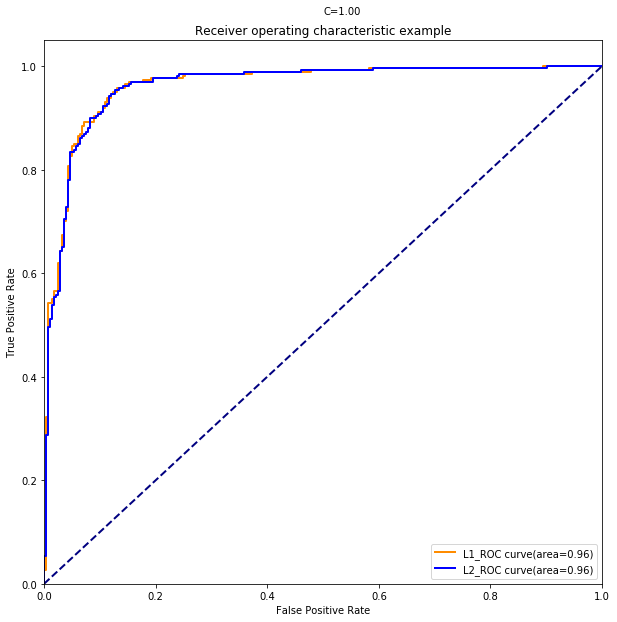

2 0.01
c=0.01
L1罚得到的参数稀疏性:85.94%
L1罚得到的模型训练性能:0.8361
L1罚得到的模型预测性能:0.8574
L2罚得到的参数稀疏性:4.69%
L2罚得到的模型训练性能:0.8839
L2罚得到的模型预测性能:0.9037


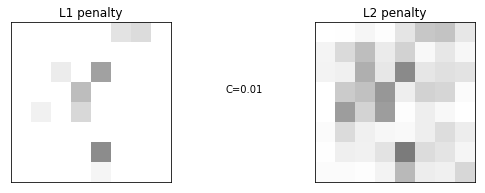

<Figure size 432x288 with 0 Axes>

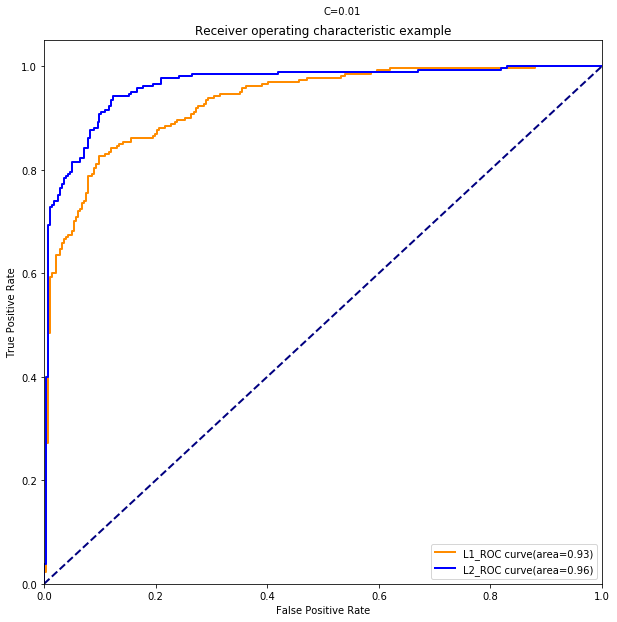

In [175]:
for i,c in enumerate((100,1,0.01)):
    print(i,c)
    #根据不同的c得到不同的LR模型
    LR_l1=LogisticRegression(C=c,penalty="l1",tol=0.01)
    LR_l2=LogisticRegression(C=c,penalty="l2",tol=0.01)
    #模型拟合
    LR_l1.fit(x_train,y_train)
    LR_l2.fit(x_train,y_train)
    #预测
    pred1=LR_l1.predict(x_test)
    pred2=LR_l2.predict(x_test)
    #计算模型预测性能
    test_score1=sum(map(int,pred1==y_test))/len(y_test)
    test_score2=sum(map(int,pred2==y_test))/len(y_test)
    #LR模型的参数向量,64维
    LR_l1_coef=LR_l1.coef_.ravel()
    LR_l2_coef=LR_l2.coef_.ravel()
    #计算L1和L2惩罚下，模型参数w的稀疏性
    LR_l1_sparsity=np.mean(LR_l1_coef==0)*100
    LR_l2_sparsity=np.mean(LR_l2_coef==0)*100
    
    print("c=%.2f"%c)
    print("L1罚得到的参数稀疏性:%.2f%%"%LR_l1_sparsity)
    print("L1罚得到的模型训练性能:%.4f"%LR_l1.score(x_train,y_train))
    print("L1罚得到的模型预测性能:%.4f"%test_score1)
    print("L2罚得到的参数稀疏性:%.2f%%"%LR_l2_sparsity)
    print("L2罚得到的模型训练性能:%.4f"%LR_l2.score(x_train,y_train))
    print("L2罚得到的模型预测性能:%.4f"%test_score2)
    
    ###画出参数稀疏性矩阵
    plt.figure(figsize=(10,10))
    l1_plot=plt.subplot(3,2,2*i+1)
    l2_plot=plt.subplot(3,2,2*(i+1))
    if True:
        l1_plot.set_title("L1 penalty")
        l2_plot.set_title("L2 penalty")
    l1_plot.imshow(np.abs(LR_l1_coef.reshape(8,8)),cmap="binary",vmax=1,vmin=0)
    l2_plot.imshow(np.abs(LR_l2_coef.reshape(8,8)),cmap="binary",vmax=1,vmin=0)
    plt.text(-5,3,"C=%.2f"%c)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    plt.show()
   
    #计算LR模型的分值：样本点到分类超平面的距离
    LR_l1_score=LR_l1.fit(x_train,y_train).decision_function(x_test)
    LR_l2_score=LR_l2.fit(x_train,y_train).decision_function(x_test)
    #计算fpr,tpr,阈值
    fpr1,tpr1,threshold1=roc_curve(y_test,LR_l1_score)
    fpr2,tpr2,threshold2=roc_curve(y_test,LR_l2_score)
    #计算auc
    roc_auc1=auc(fpr1,tpr1)
    roc_auc2=auc(fpr2,tpr2)
    #画ROC曲线
    plt.figure()
    lw=2
    plt.figure(figsize=(10,10))
    plt.plot(fpr1,tpr1,color="darkorange",lw=lw,label="L1_ROC curve(area=%0.2f)"% roc_auc1)
    plt.plot(fpr2,tpr2,color="blue",lw=lw,label="L2_ROC curve(area=%0.2f)"% roc_auc2)
    plt.plot([0,1],[0,1],color="navy",lw=lw,linestyle="--")
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.text(0.5,1.1,"C=%.2f"%c)
    plt.show()
